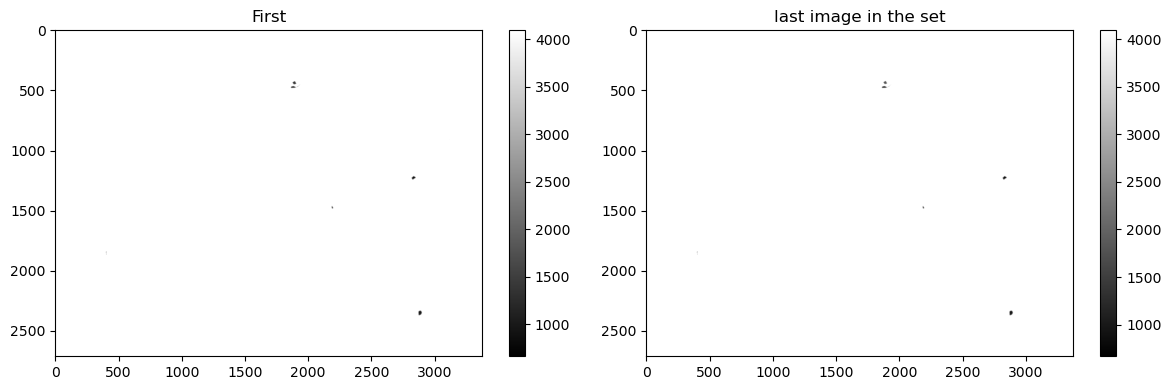

In [87]:
#import imeges 
from openpiv.tools import imread
from pylab import *

a = imread('EXP01TRY000001.T000.D000.P000.H000.LB.TIF') #first image
b = imread('EXP01TRY000010.T000.D000.P000.H000.LB.TIF') #last image in the set

# Set a larger figure size
figure(figsize=(12, 4))

# Display image 'a'
subplot(1, 2, 1)
imshow(a, cmap='gray', aspect= 'auto')
colorbar()
title('First')

# Display image 'b'
subplot(1, 2, 2)
imshow(b, cmap='gray', aspect= 'auto')
colorbar()
title('last image in the set')

# Adjust layout to prevent overlapping
tight_layout()
show()

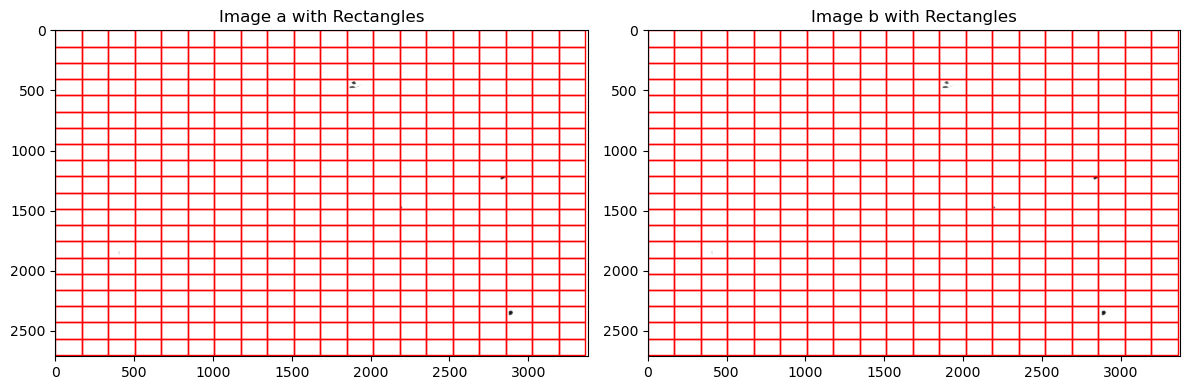

In [88]:
from openpiv.tools import imread
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# Define the number of rows and columns in the mesh
num_rows = 20
num_cols = 20

# Calculate the width and height of each rectangle
rect_width = a.shape[1] // num_cols
rect_height = a.shape[0] // num_rows

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot image 'a' with rectangles
ax[0].imshow(a, cmap='gray', aspect='auto')

# Add rectangles to image 'a'
for i in range(num_rows):
    for j in range(num_cols):
        rect = Rectangle((j * rect_width, i * rect_height), rect_width, rect_height,
                         linewidth=1, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)

ax[0].set_title('Image a with Rectangles')

# Plot image 'b' with rectangles
ax[1].imshow(b, cmap='gray', aspect='auto')

# Add rectangles to image 'b'
for i in range(num_rows):
    for j in range(num_cols):
        rect = Rectangle((j * rect_width, i * rect_height), rect_width, rect_height,
                         linewidth=1, edgecolor='r', facecolor='none')
        ax[1].add_patch(rect)

ax[1].set_title('Image b with Rectangles')

# Adjust layout
plt.tight_layout()
plt.show()


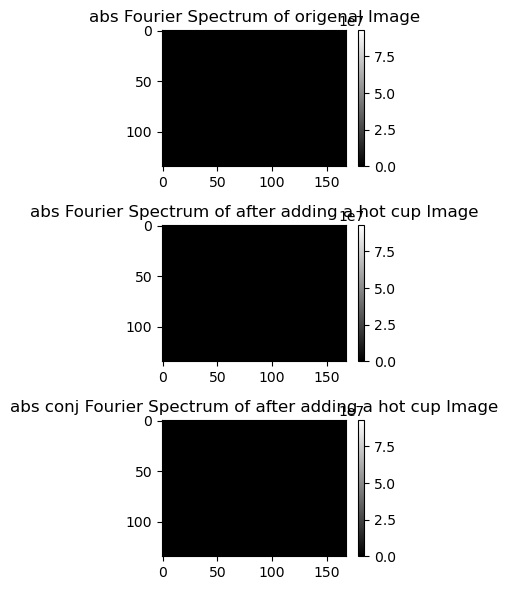

In [89]:
#transform to fourier spectrume

# Calculate the width and height of each rectangle
rect_width = a.shape[1] // num_cols
rect_height = a.shape[0] // num_rows


#transform on the mesh of the image
# Iterate through rectangles in image 'a'
for i in range(num_rows):
    for j in range(num_cols):
        # Define the region of interest (ROI) for the current rectangle
        roi_a = a[i * rect_height:(i + 1) * rect_height, j * rect_width:(j + 1) * rect_width]
        roi_b = b[i * rect_height:(i + 1) * rect_height, j * rect_width:(j + 1) * rect_width]

        # Perform the code within the current rectangle
        I_1 = np.fft.fft2(roi_a)
        I_2 = np.fft.fft2(roi_b)
        I_2_conj = np.conj(I_2)

        
#transform on total image
#I_1=fft2(a) #fourier spectrume first image
#I_2=fft2(b) #fourier spectrume last image
#I_2_conj=conj(fft2(b)) # the conjugate of fourier spectrume last image

#plot results
figure(figsize=(3, 6))

subplot(3, 1, 1)
imshow(abs(I_1), cmap='gray', aspect='auto')  # plot abs Fourier spectrum and display
colorbar()
title('abs Fourier Spectrum of origenal Image')


subplot(3, 1, 2)
imshow(abs(I_2), cmap='gray', aspect='auto')  # plot abs Fourier spectrum and display
colorbar()
title('abs Fourier Spectrum of after adding a hot cup Image')

subplot(3, 1, 3)
imshow(abs(I_2_conj), cmap='gray' , aspect='auto')  # plot abs Fourier spectrum and display
colorbar()
title('abs conj Fourier Spectrum of after adding a hot cup Image')


# Adjust layout to prevent overlapping
tight_layout()
show()

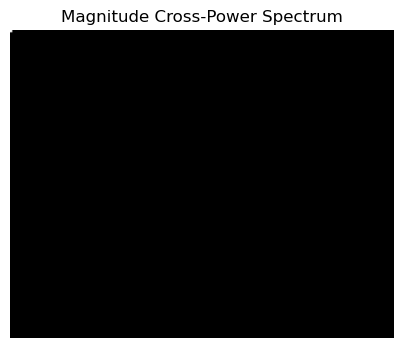

In [90]:
# find the cross power spectrum
# Calculate the cross-power spectrum
cross_power_spectrum = I_1 * I_2_conj

# calculate the magnitude of the cross-power spectrum for visualization
magnitude_cross_power_spectrum = np.abs(cross_power_spectrum)

figure(figsize=(12, 4))
# Plot the magnitude of the cross-power spectrum
plt.imshow(np.log(1 + magnitude_cross_power_spectrum), cmap='gray')
plt.title('Magnitude Cross-Power Spectrum'), plt.axis('off')

plt.show()

Maximum Difference (Pixel Level): 65535
Maximum Difference (Subpixel Level): 65535.0
Maximum Power in Cross-Power Spectrum: 8625691325160000.0
Position of Maximum: (0, 0)
Corresponding Frequency: (0.0, 0.0)


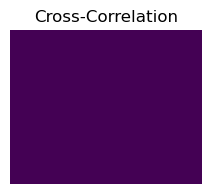

In [91]:
# inverse Fourier transform of the cross-power spectrum
#cross-correlation  (R_1)

# Calculate the cross-correlation function by inverse Fourier transform
cross_correlation_function = np.fft.ifft2(cross_power_spectrum)

fig = plt.figure(figsize=(3, 2))
# Plot the cross-correlation function
plt.imshow(np.real(cross_correlation_function), cmap='viridis')
plt.title('Cross-Correlation'), plt.axis('off')

# Calculate the maximum difference at pixel level
max_difference_pixel = np.max(np.abs(a - b))
print(f"Maximum Difference (Pixel Level): {max_difference_pixel}")

# Calculate the maximum difference at subpixel level
max_difference_subpixel = np.max(np.abs(np.fft.ifft2(np.fft.fft2(a - b))))
print(f"Maximum Difference (Subpixel Level): {max_difference_subpixel}")

# Calculate the maximum power in the cross-power spectrum
max_power = np.max(np.abs(cross_power_spectrum))
print(f"Maximum Power in Cross-Power Spectrum: {max_power}")

# Find the position (index) of the maximum in the cross-power spectrum
max_position = np.unravel_index(np.argmax(np.abs(cross_power_spectrum)), cross_power_spectrum.shape)

# Calculate the corresponding frequency
max_frequency = np.fft.fftfreq(cross_power_spectrum.shape[0])[
    max_position[0]] * 2, np.fft.fftfreq(cross_power_spectrum.shape[1])[max_position[1]] * 2
print(f"Position of Maximum: {max_position}")
print(f"Corresponding Frequency: {max_frequency}")

plt.show()

scaled velocity values: -42.0 -20.5


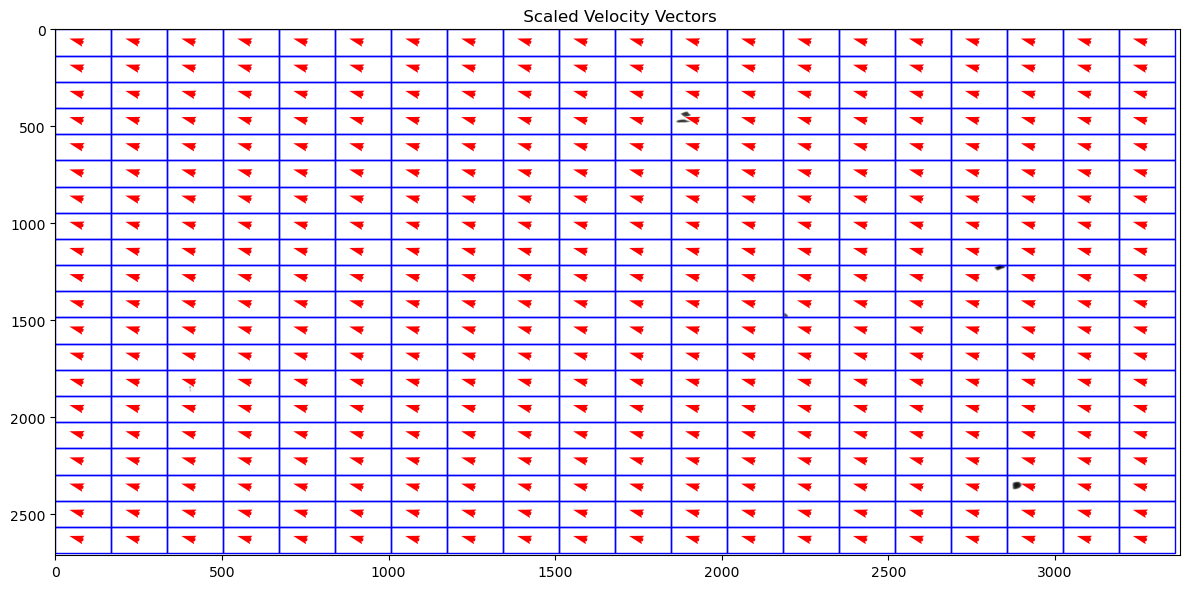

In [92]:
# plot velocity field 

# Lists to store velocity information
velocities = []

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot image 'a' with rectangles
ax.imshow(a, cmap='gray', aspect='auto')

# Iterate through rectangles in image 'a'
for i in range(num_rows):
    for j in range(num_cols):

        #result_phase = np.cross_correlation_function#fft.ifft2(I_1 * I_2_conj).real
        max_position_phase = np.unravel_index(np.argmax(cross_correlation_function), 
                                    cross_correlation_function.shape)
        displacement_phase = (
            max_position_phase[0] - cross_correlation_function.shape[0] // 2,
            max_position_phase[1] - cross_correlation_function.shape[1] // 2
        )
        dt = 2
        velocity_phase = (
            displacement_phase[0] / dt,
            displacement_phase[1] / dt
        )
        # Append velocity information to the list
        velocities.append(velocity_phase)

        # Plot rectangle on image 'a'
        rect = Rectangle((j * rect_width, i * rect_height), rect_width, rect_height,
                         linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

# Convert velocities list to NumPy array
velocities = np.array(velocities)

# Rescale velocities to be relative to the largest value
max_velocity = np.max(np.abs(velocities))
#scaled_velocities = velocities / max_velocity

# Reshape scaled_velocities to have the same shape as quiver inputs
scaled_velocities = velocities.reshape((num_rows, num_cols, 2))

# Print the range of scaled velocity values
print("scaled velocity values:", np.min(velocities), np.max(scaled_velocities))

# Plot scaled velocity vectors on image 'a' in red
ax.quiver(
    np.arange(num_cols) * rect_width + rect_width / 2,
    np.arange(num_rows) * rect_height + rect_height / 2,
    scaled_velocities[:, :, 1],  # x component
    scaled_velocities[:, :, 0],  # y component
    angles='xy', scale_units='xy', scale=1, color='red', width=0.005
)

ax.set_title(' Scaled Velocity Vectors')

# Adjust layout
plt.tight_layout()
plt.show()

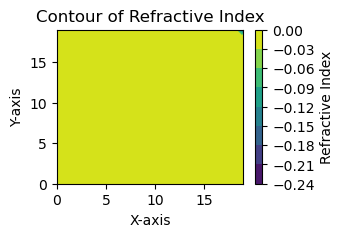

In [93]:
#index of refraction variation
import numpy as np
import matplotlib.pyplot as plt

# Constants
speed_of_light=3*(10^8) # [m/s]

#from ULC-2 manual 16,17 and 18
courent=930 # [mA]
pw=0.01/(courent*0.001)
T_period=pw+ (15*(10^-6)) 
frequancy_of_light=1/T_period   

wavelength = speed_of_light/frequancy_of_light  # Wavelength of light in meters

# Initialize an array to store refractive index values
refractive_index_array = np.zeros((num_rows, num_cols))


# Calculate the phase shift
phase_shift = 2 * np.pi * velocity_phase[0] / wavelength

# Assuming the path length is related to displacement (you may need to adjust this)
path_length = np.sqrt(displacement_phase[0]**2 + displacement_phase[1]**2)

# Calculate the refractive index
refractive_index = wavelength * phase_shift / (2 * np.pi * path_length)

# Store the refractive index in the array
refractive_index_array[i, j] = refractive_index

fig = plt.figure(figsize=(3, 2))
# Plotting the contour of the refractive index
plt.contourf(refractive_index_array, cmap='viridis')  # Replace 'refractive_index_array' with your actual array
plt.colorbar(label='Refractive Index')
plt.title('Contour of Refractive Index')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


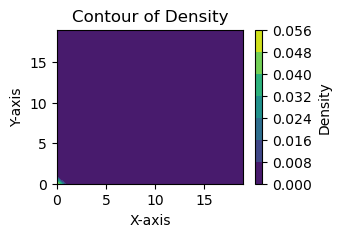

In [94]:
#dinsity
# gladestone-dale equation 
G_dale=2.2244*(10^-4)*(1+((6.7132-(10^-8))/(wavelength)))
density=(refractive_index -1)/G_dale

# Initialize an array to store density values
density_array = np.zeros((num_rows, num_cols))

# Store the density in the array
density_array[0, 0] = density

fig = plt.figure(figsize=(3, 2))
# Plotting the contour of the density
plt.contourf(density_array, cmap='viridis')  # Replace 'density_array' with your actual array
plt.colorbar(label='Density')
plt.title('Contour of Density')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


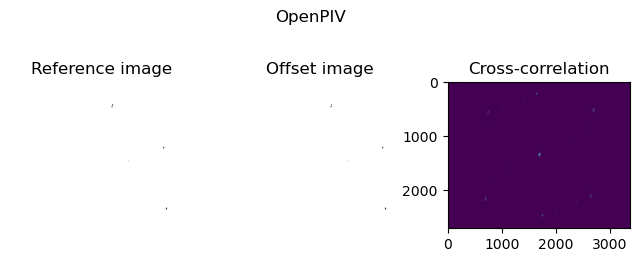

Detected pixel offset (y, x): [0. 0.]
Detected subpixel offset (y, x): [0. 0.]


In [95]:
#find the -- using direct cross-correlation 
from skimage.registration import phase_cross_correlation

image = a
offset_image = b
# pixel precision first
shift, error, diffphase = phase_cross_correlation(image, offset_image)

fig = plt.figure(figsize=(8, 3))
fig.suptitle("OpenPIV")

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(image).conj() * np.fft.fft2(offset_image)
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real, cmap='viridis')
ax3.set_title("Cross-correlation")

plt.show()

print("Detected pixel offset (y, x): {}".format(shift))
print("Detected subpixel offset (y, x): {}".format(shift))

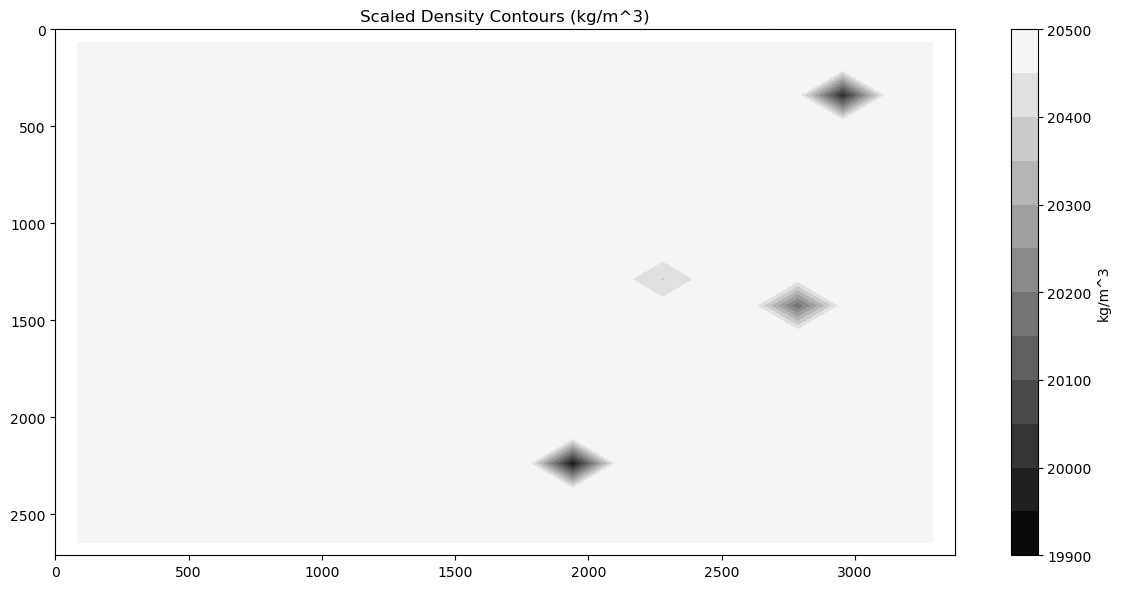

In [96]:
#density gradient with SI units,Please replace the pixel_to_si_factor and
# si_unit variables with the appropriate calibration factors for your specific application.
from openpiv.tools import imread
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load calibration factors or use known information about the image
# Replace these values with the appropriate calibration factors
pixel_to_si_factor = 5  # Conversion factor from pixel intensity to SI units
si_unit = "kg/m^3"  # Replace with the appropriate SI unit


# Lists to store density and gradient information
densities = []

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot image 'a' with rectangles
ax.imshow(a, cmap='gray', aspect='auto')

# Iterate through rectangles in image 'a'
for i in range(num_rows):
    for j in range(num_cols):
        # Define the region of interest (ROI) for the current rectangle
        roi_a = a[i * rect_height:(i + 1) * rect_height, j * rect_width:(j + 1) * rect_width]

        # Calculate the density as the mean of the ROI
        density = np.mean(roi_a) * pixel_to_si_factor  # Convert pixel intensity to SI units
        densities.append(density)

# Convert densities list to NumPy array
densities = np.array(densities)

# Reshape densities to have the same shape as the image
density_field = densities.reshape((num_rows, num_cols))

# Plot scaled density contours on image 'a' with a "rainbow" colormap
contour = ax.contourf(
    density_field,
    levels=10,  # You can adjust the number of contour levels
    cmap='gray',
    extent=(0, a.shape[1], 0, a.shape[0]),
    origin='upper'
)

# Add colorbar
cbar = plt.colorbar(contour, label=si_unit)

ax.set_title(f'Scaled Density Contours ({si_unit})')

# Adjust layout
plt.tight_layout()
plt.show()
